# Breakout (Atari版ブロック崩し)の動作テスト

## google colab\. 用のインストールコマンドたち

In [ ]:
!pip3 install tqdm
!pip3 install opencv-python
# pytorch
!pip3 install -q torch torchvision

# 表示ウィンドウ & 動画の保存
!pip3 install -q JSAnimation

# ここからhttp://bcl.sci.yamaguchi-u.ac.jp/~jun/ja/blog/180828-openai-colaboratoryを参照した
# !apt-get -qq -y install libcusparse8.0 libnvrtc8.0  > /dev/null
!echo install libnvtoolsext1
!apt-get -qq -y install libnvtoolsext1  #> /dev/null
!echo ln
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so

!echo ffmpeg
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip install -q pyglet
!pip install -q pyopengl
!pip install -q pyvirtualdisplay
!pip install -q gym[classic_control]
# ここまで

# 動作環境
!pip3 install gym
!pip3 install atari-py

!mkdir breakout
# cd に%を使うらしい　https://stackoverflow.com/questions/48298146/changing-directory-in-google-collab-breaking-out-of-the-python-interpreter
% cd breakout
!git clone https://github.com/openai/baselines.git 
% cd baselines
!pip install -e .

## 仮想ディスプレイ

In [ ]:
from pyvirtualdisplay import Display as VirtualDisplay
disp = VirtualDisplay(visible=0, size=(1024, 768))
disp.start()
import os
os.environ["DISPLAY"] = ":" + str(disp.display) + "." + str(disp.screen)

## gymのimport

In [6]:
import gym

ENV = "Breakout-v0"
env = gym.make(ENV)

In [7]:
env.observation_space

Box(210, 160, 3)

In [8]:
env.action_space

Discrete(4)

In [9]:
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 描画関数部

In [11]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

In [12]:
def display_frames_as_gif(frames):
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis("off")
    
    def animate(i): patch.set_data(frames[i])
    
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
    
    anim.save('breakout-test.mp4')
    display(display_animation(anim, default_mode="loop"))


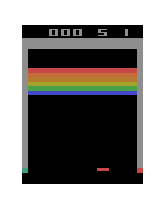
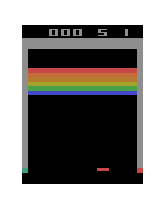
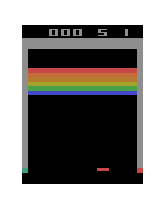
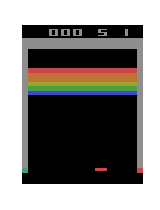
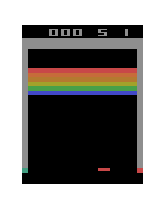
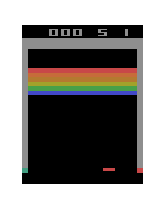
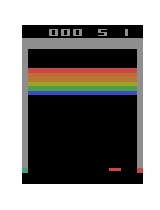
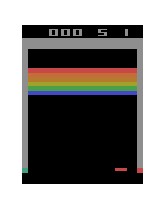
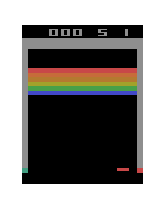
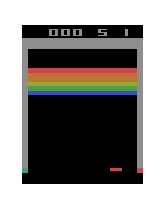
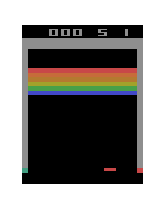
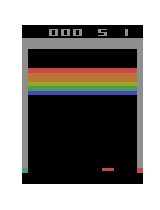
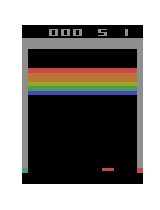
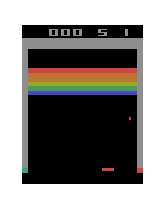
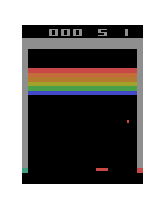
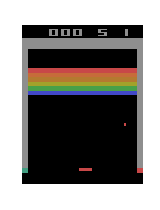
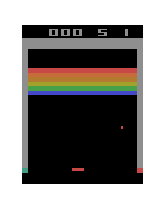
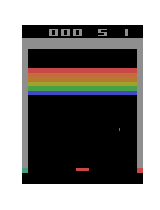
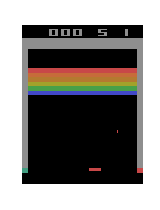
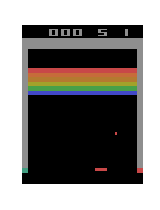
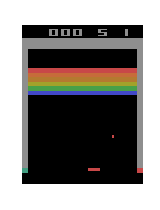
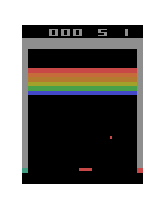
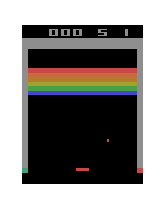
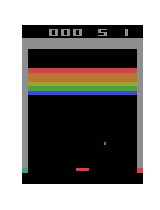
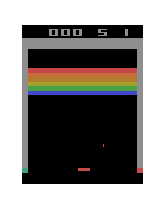
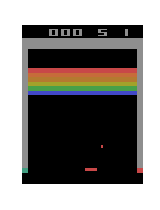
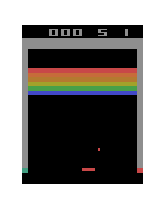
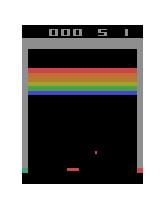
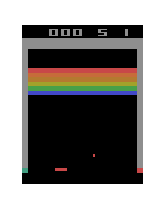
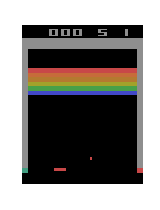
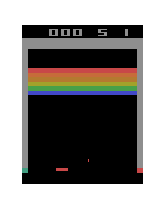
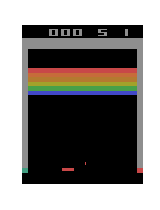
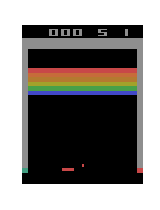
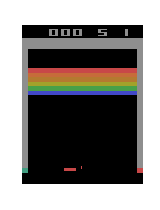
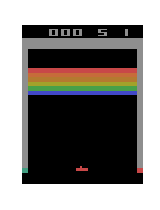
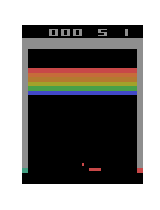
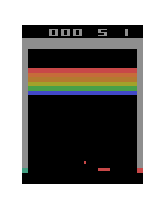
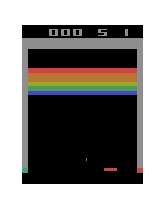
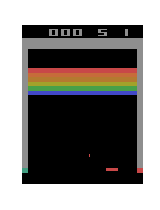
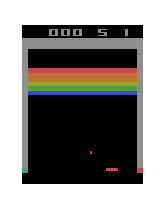
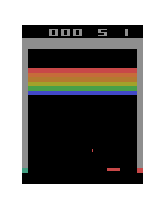
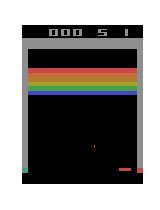
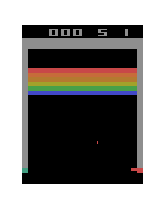
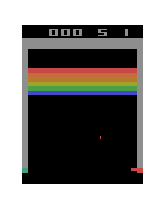
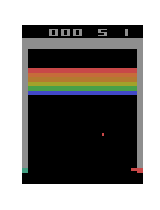
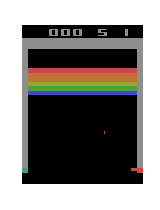
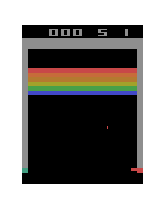
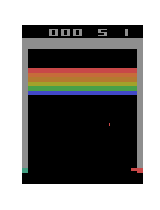
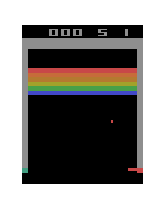
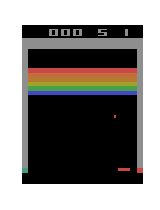
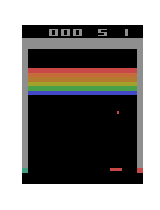
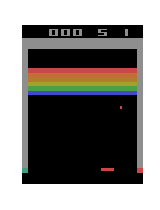
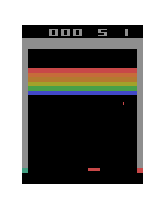
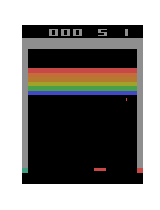
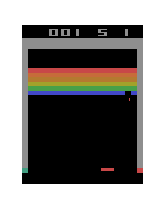
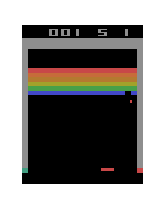
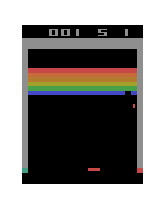
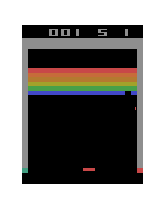
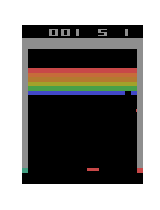
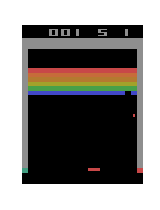
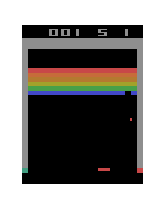
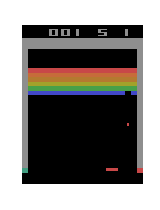
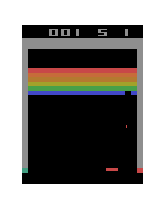
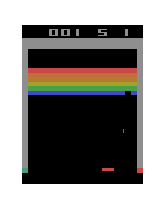
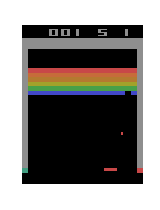
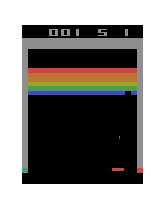
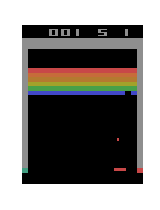
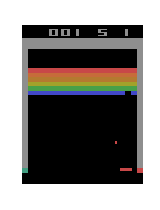
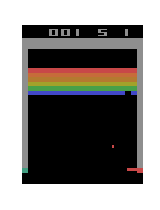
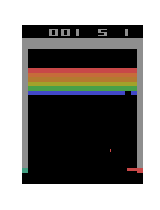
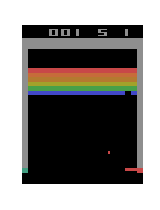
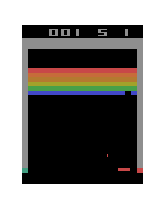
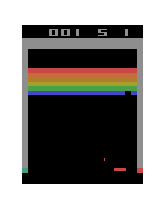
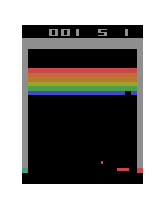
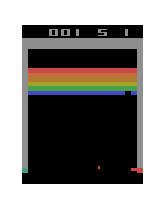
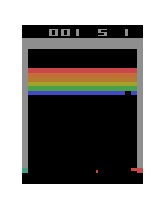
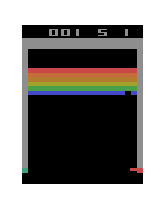
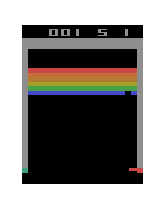
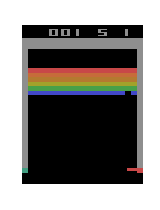
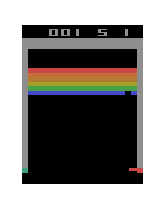
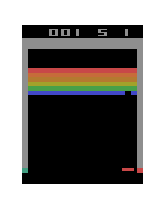
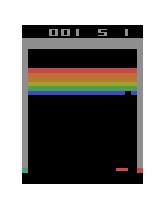
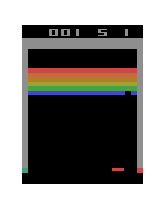
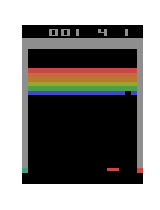
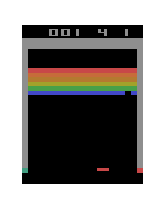
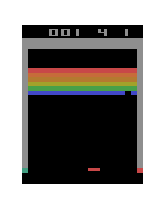
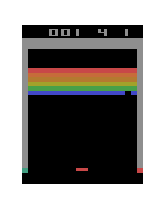
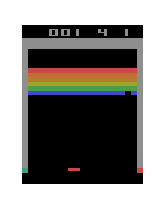
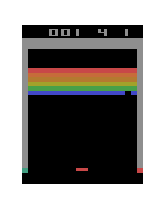
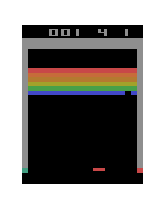
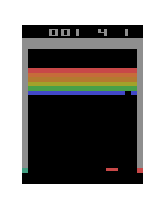
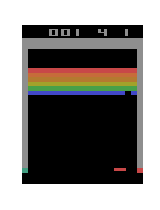
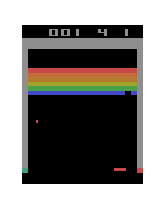
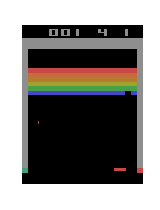
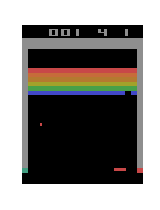
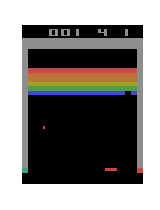
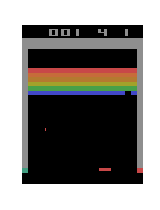
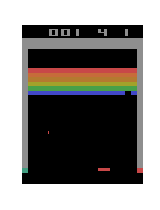
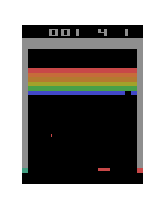
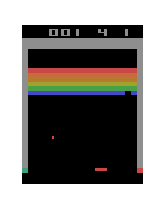
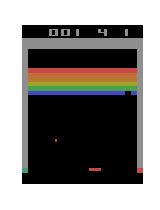
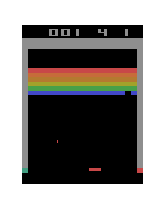
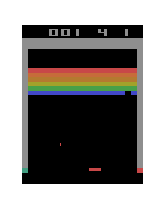
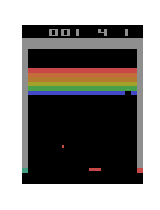
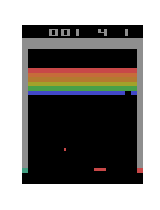
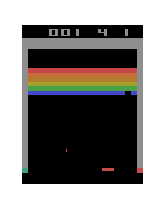
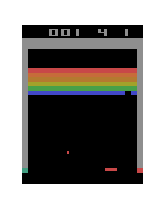
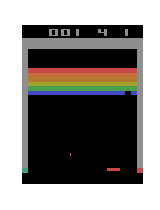
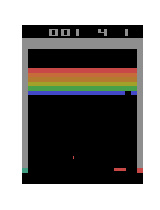
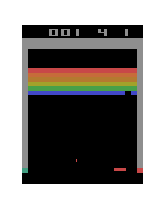
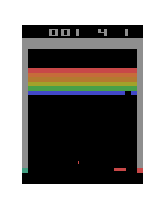
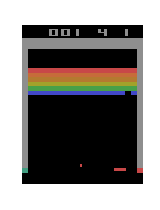
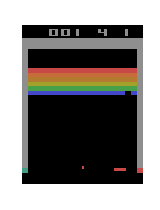
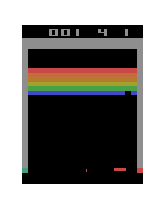
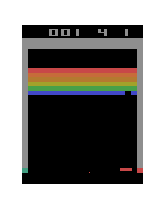
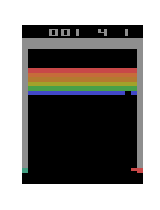
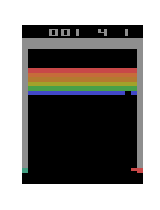
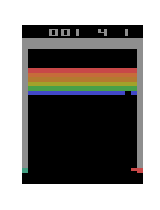
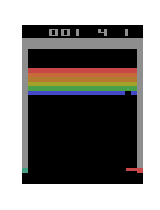
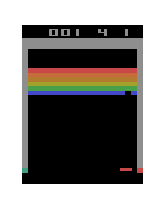
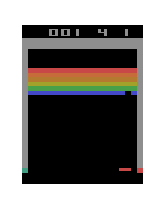
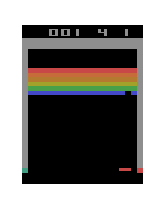
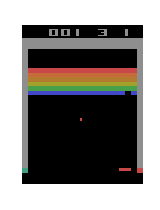
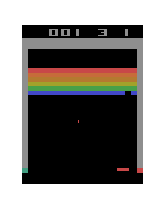
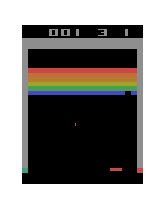
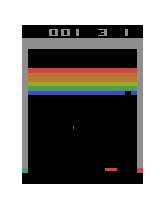
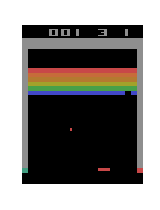
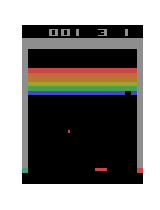
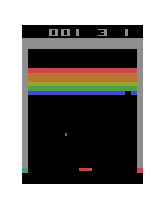
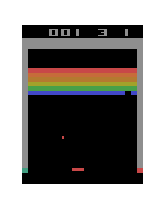
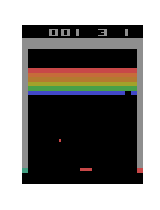
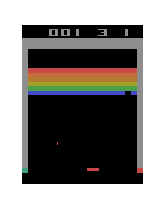
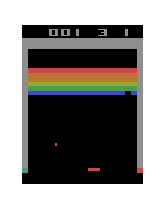
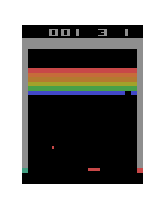
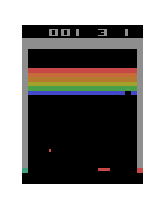
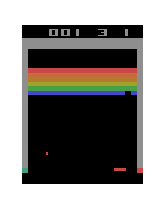
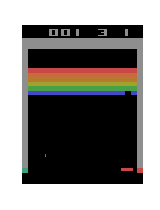
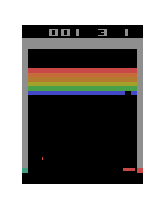
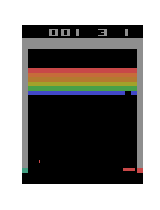
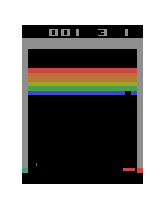
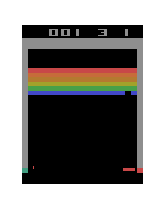
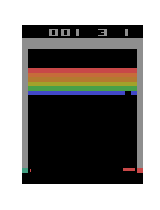
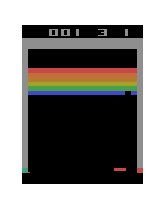
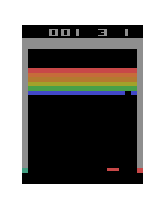
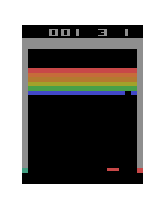
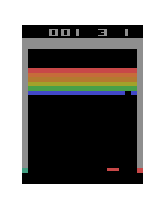
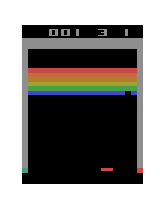
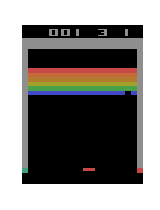
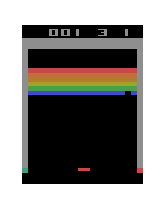
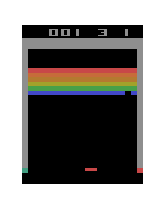
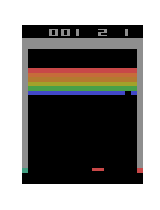
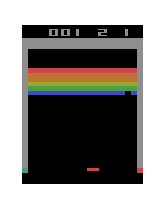
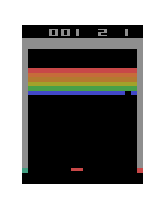
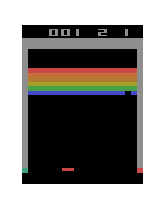
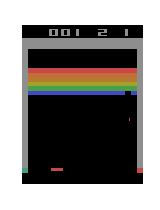
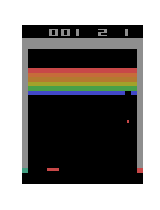
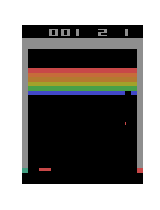
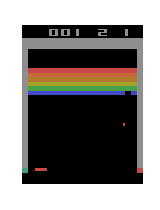
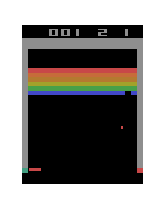
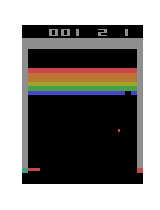
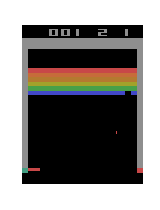
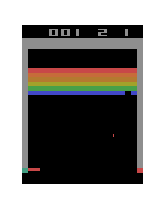
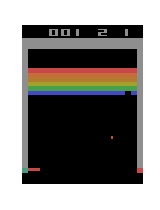
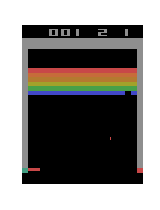
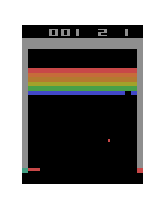
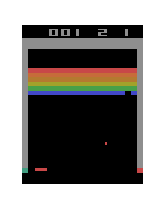
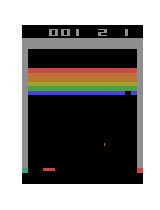
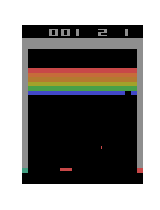
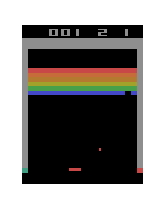
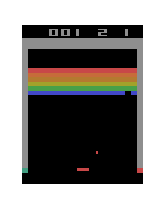
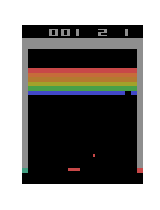
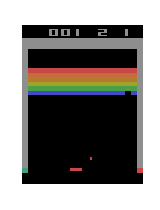
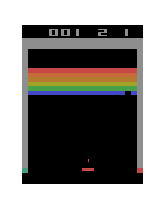
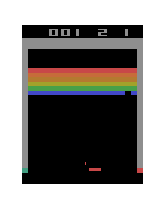
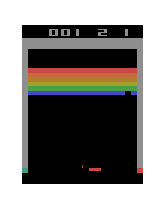
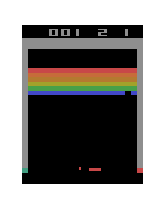
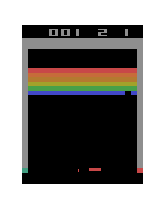
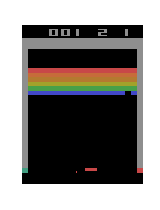
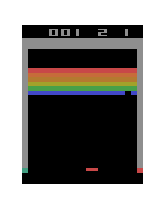
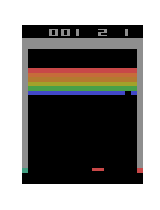
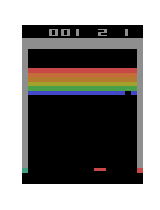
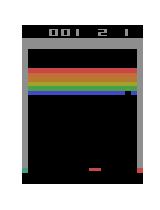
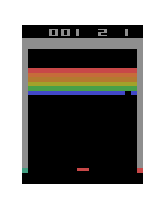
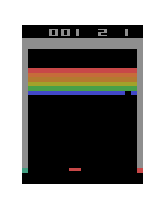
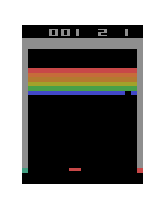
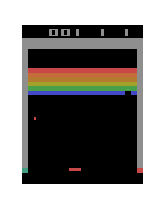
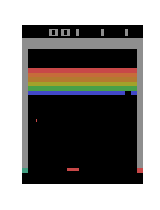
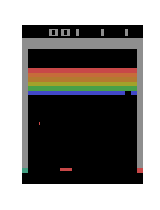
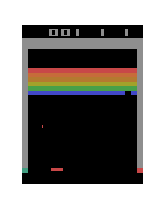
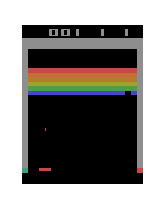
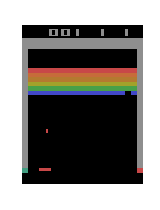
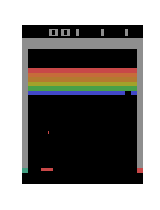
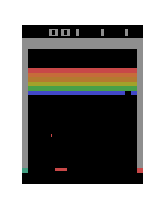
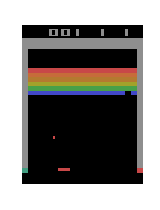
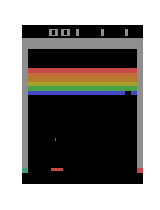
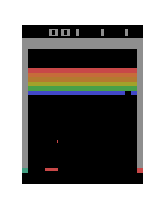
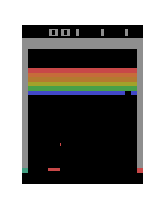
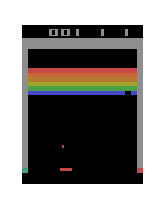
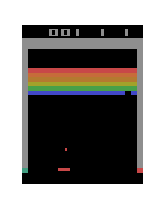
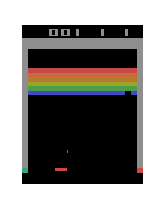
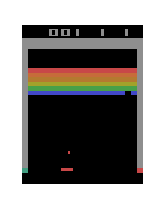
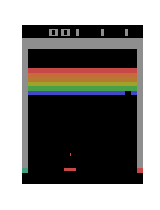
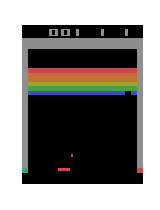
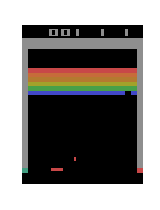
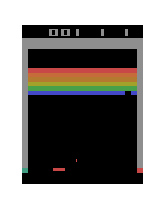
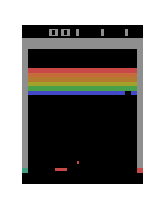
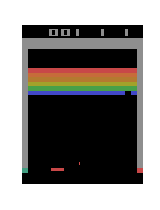
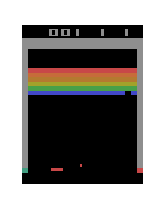
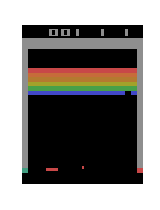
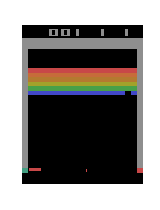
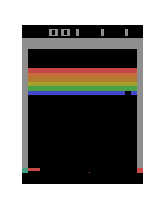
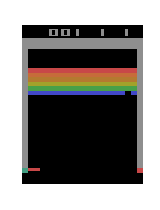
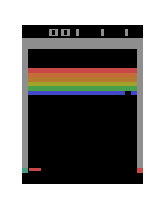
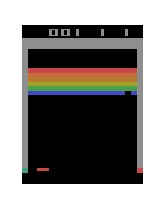
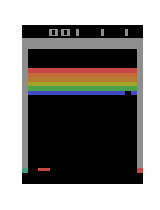
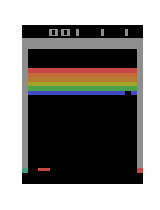
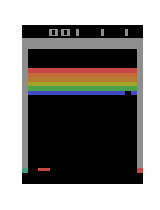
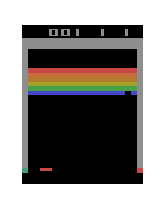
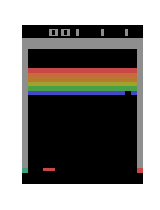

In [13]:
frames = []
observation = env.reset()

for step in range(1000):
    frames.append(observation)
    action = np.random.randint(0, 4)
    observation_next, reward, done, info = env.step(action)
    
    observation = observation_next
    
    if done: break
    
display_frames_as_gif(frames)